In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


In [ ]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [ ]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


In [ ]:
# Step 1: Load the Dataset
data = pd.read_csv('water_potability.csv')
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [ ]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


In [ ]:
# Step 2: Check for Missing Values
print("Missing values:\n", df.isnull().sum())

Missing values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


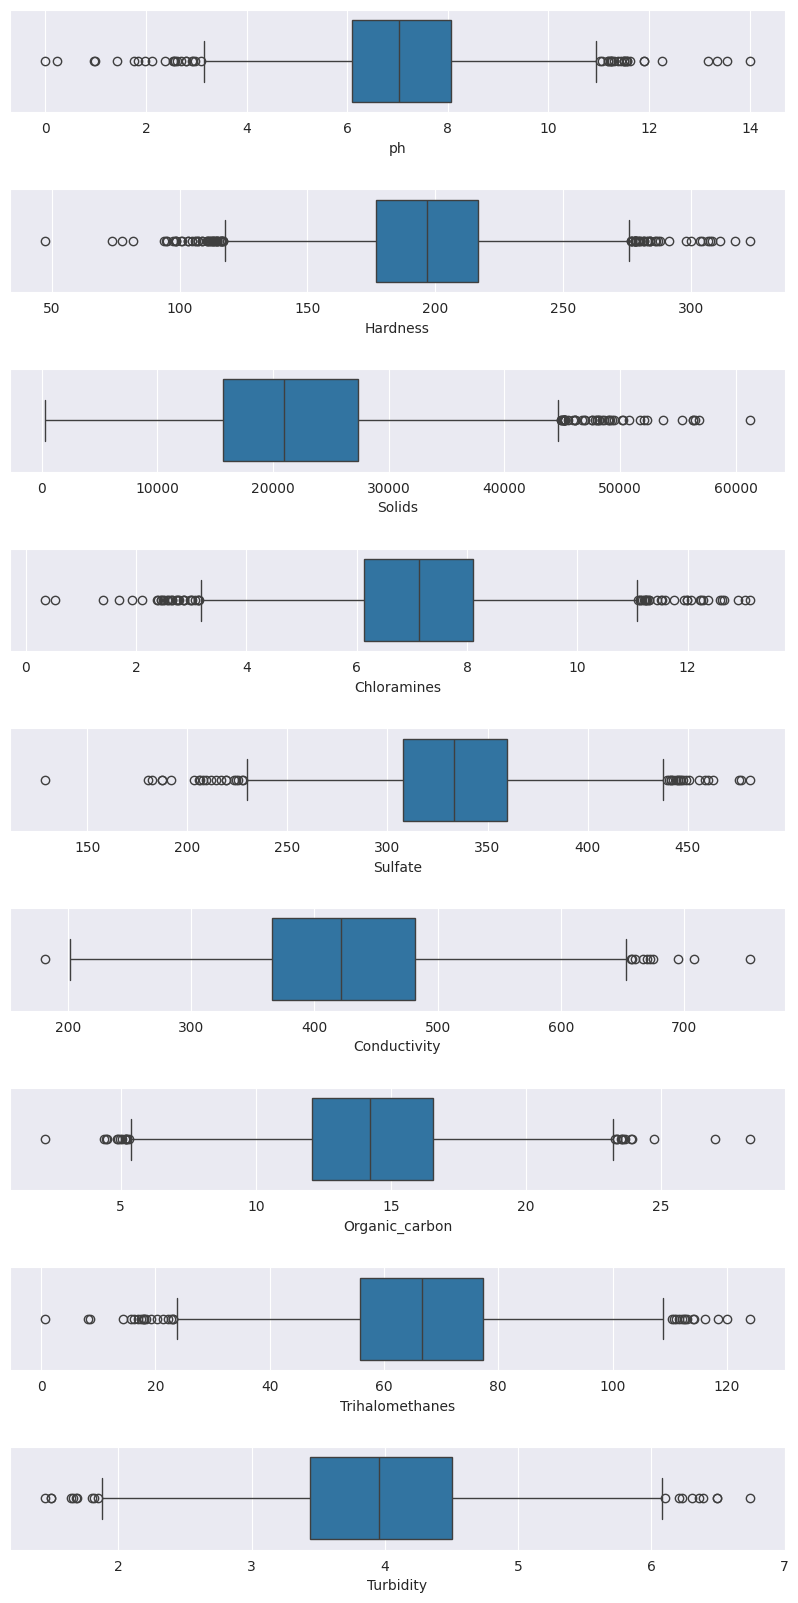

In [ ]:
# plots
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i])

Potability
0    1998
1    1278
Name: count, dtype: int64


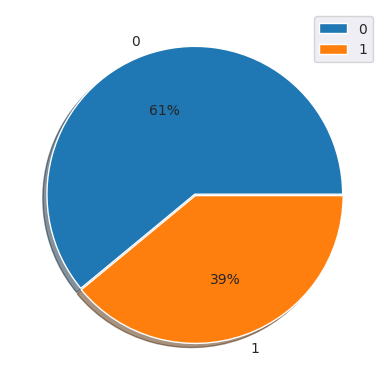

In [ ]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

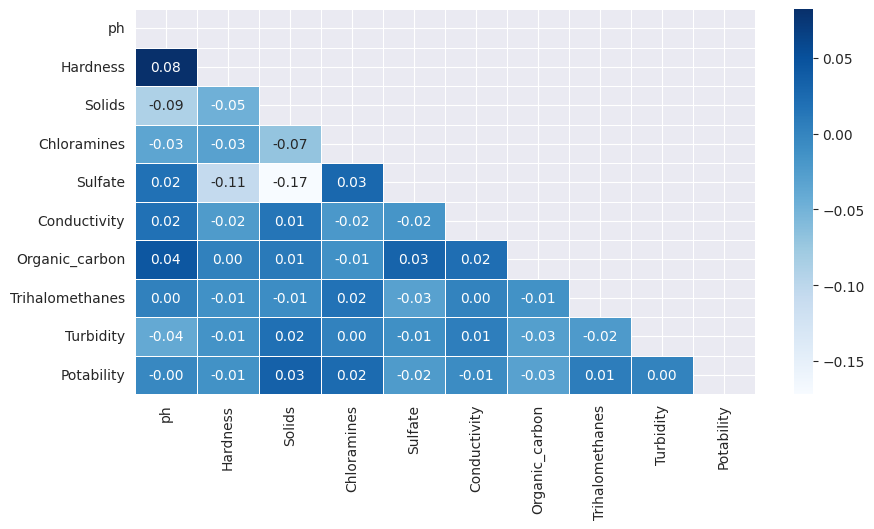

In [ ]:
#Correlation
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

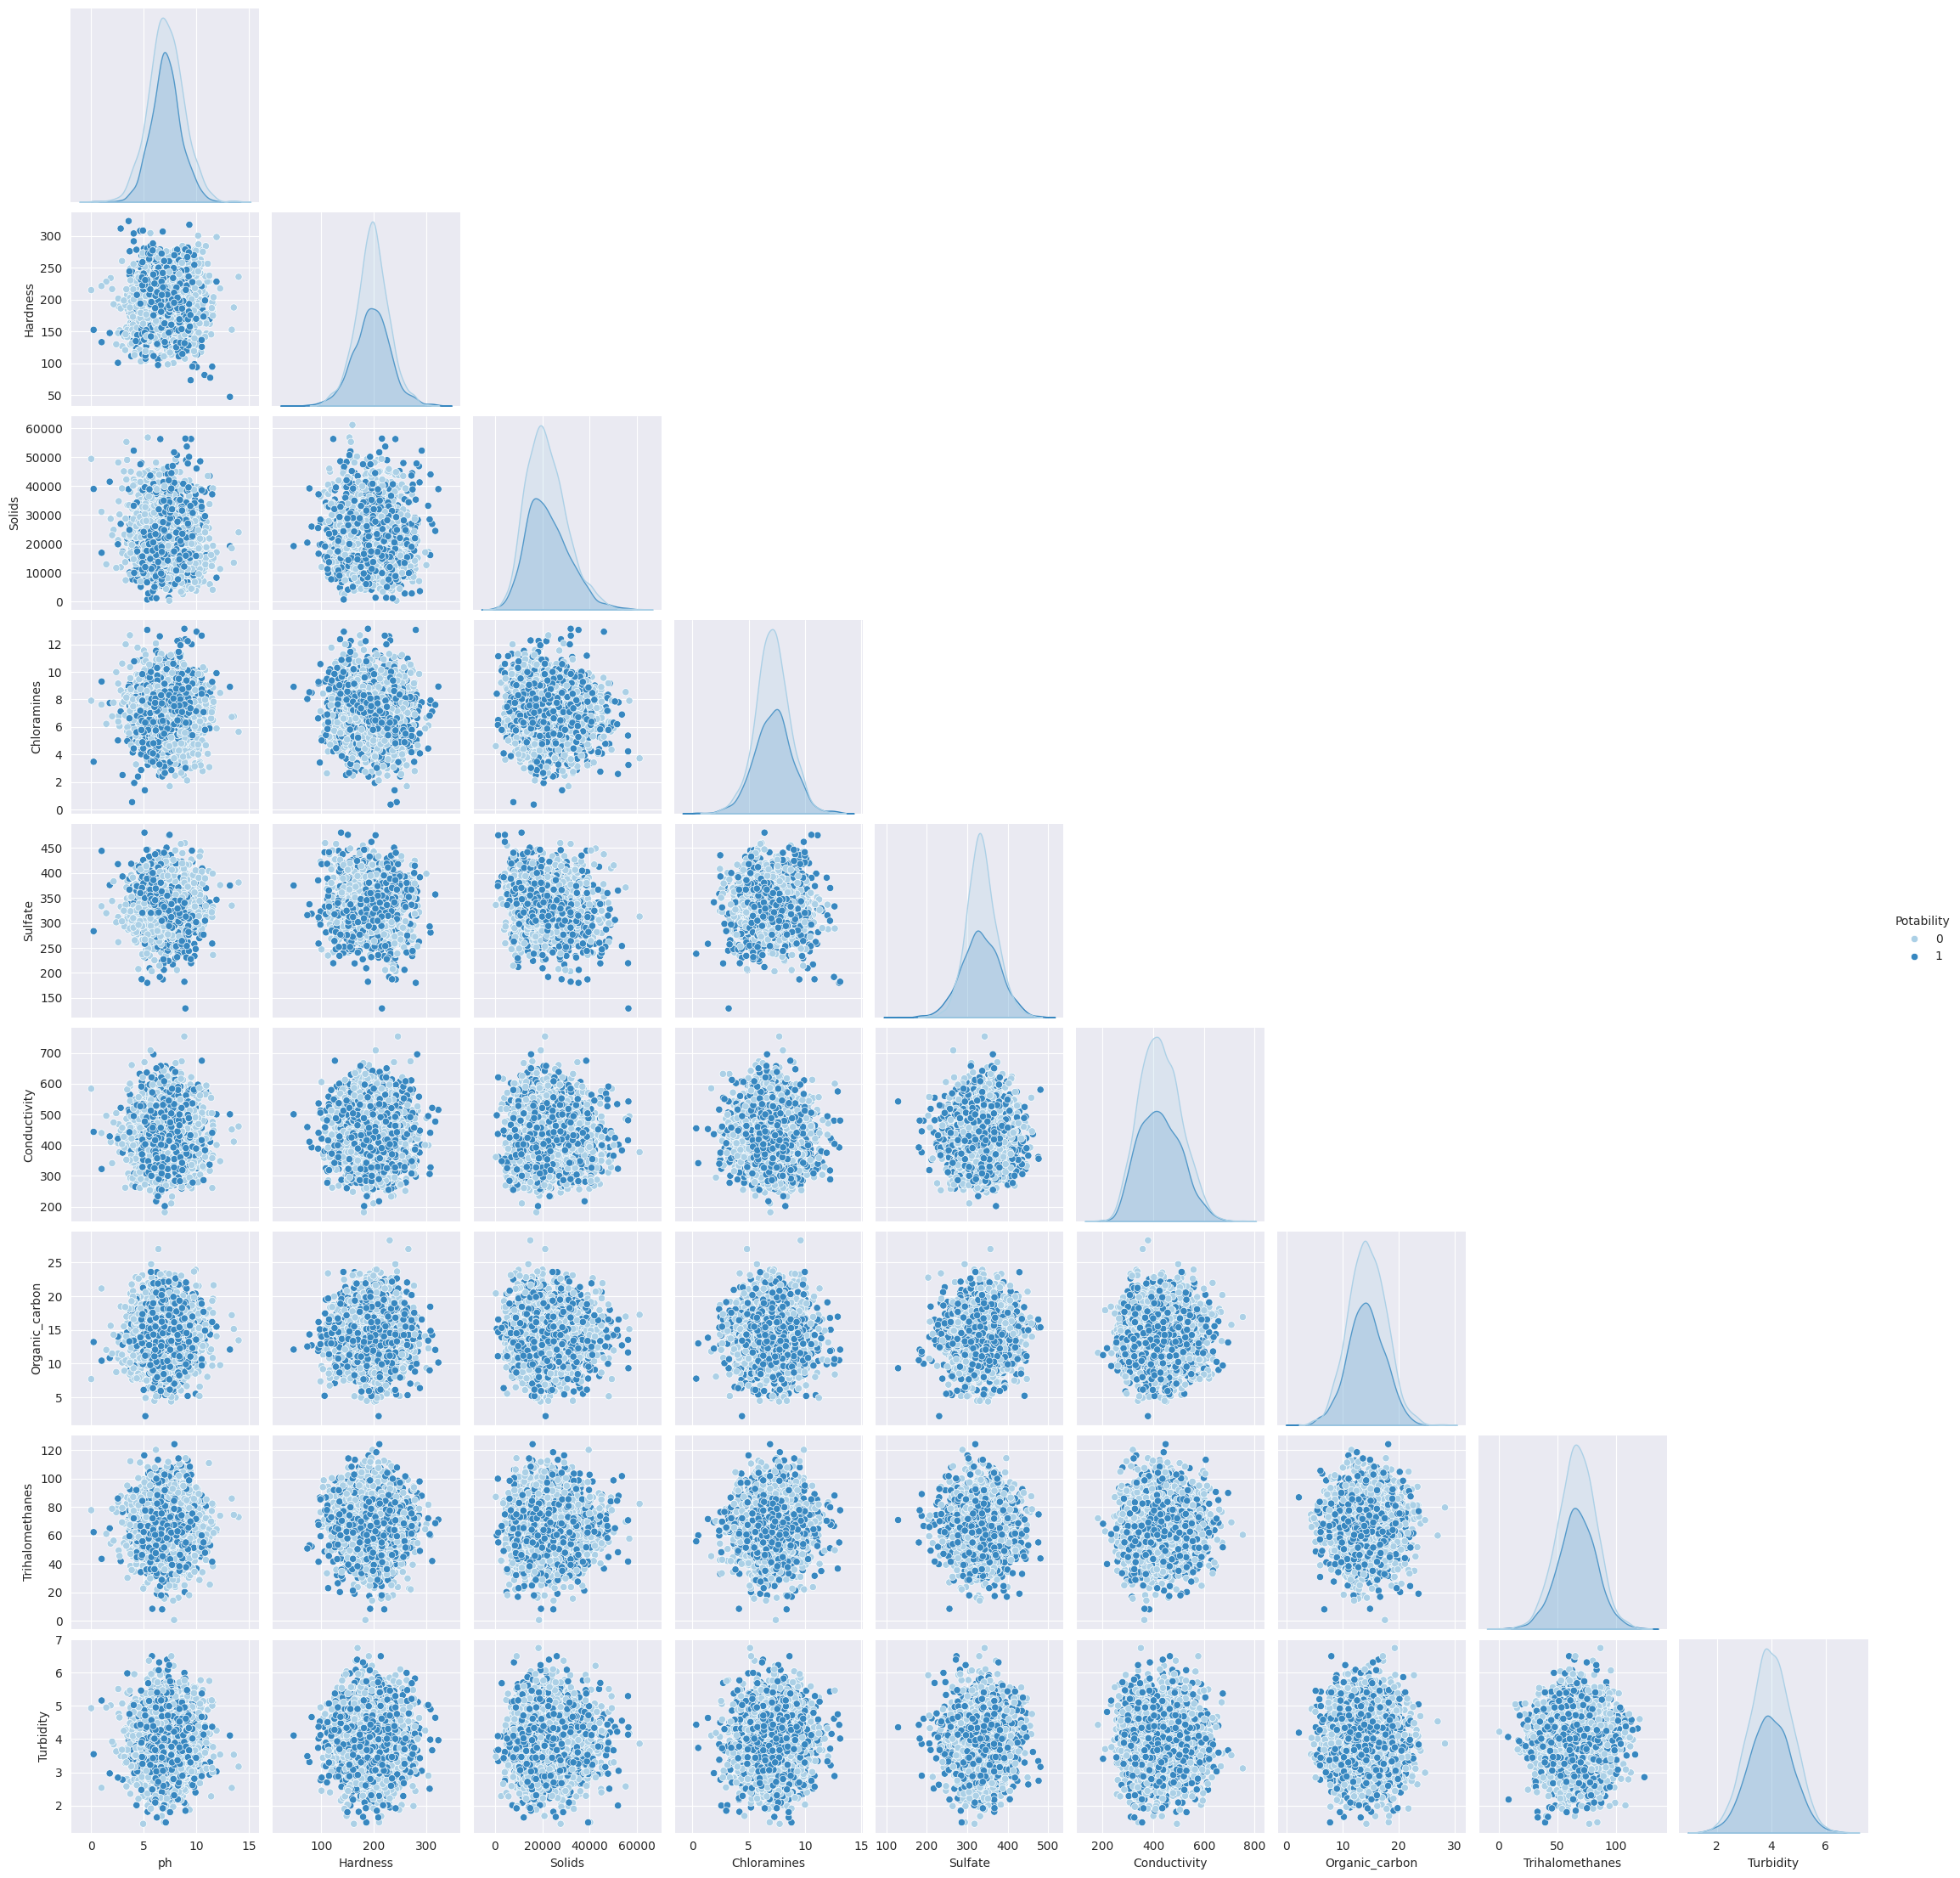

In [ ]:
sns.pairplot(data, hue='Potability', corner=True, palette='Blues')
plt.show()

In [ ]:
#Processing ,Missing Values Handling
data.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [ ]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


,0
ph,7.036752
Sulfate,331.838167
Trihalomethanes,66.678214


In [ ]:
print("For Potability=1")
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


,0
ph,7.035456
Sulfate,333.389426
Trihalomethanes,66.542198


In [ ]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [ ]:
data.isna().sum().sum()

0

In [ ]:
#Normalization
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


In [ ]:
#Modeling
#Initialization
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


In [ ]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [ ]:
# Logistic Regression
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(colored('LogisticRegression Score : {}'.format(lr_score), 'green'))

LogisticRegression Score : 0.627


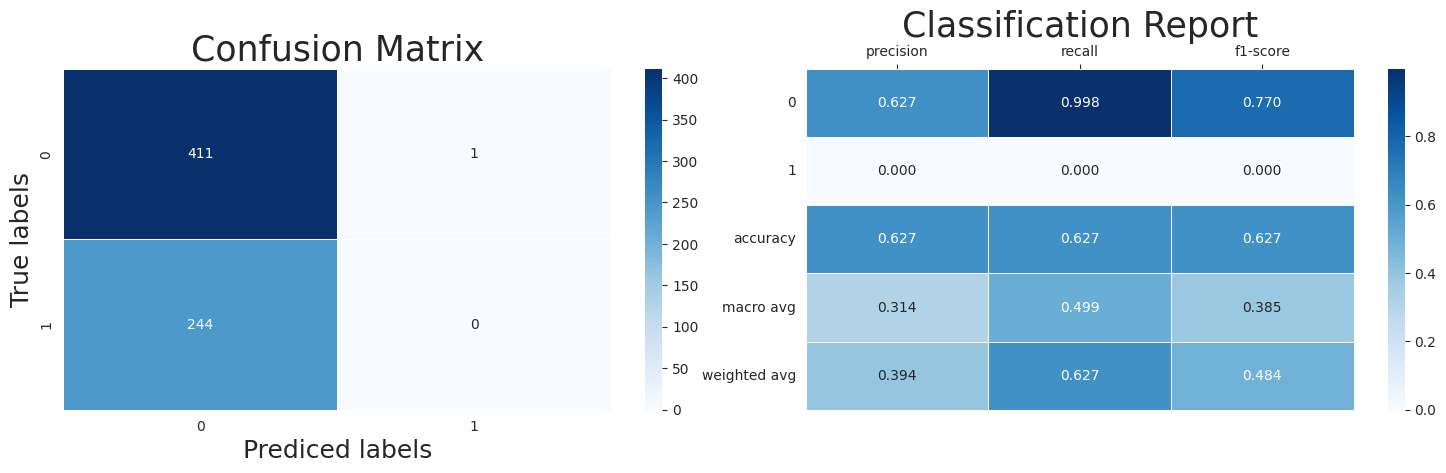

In [ ]:
plot_result(y_pred_lr)

In [ ]:
#| RandomForestClassifier
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [100],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}


In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

RandomForestClassifier Score : 0.683


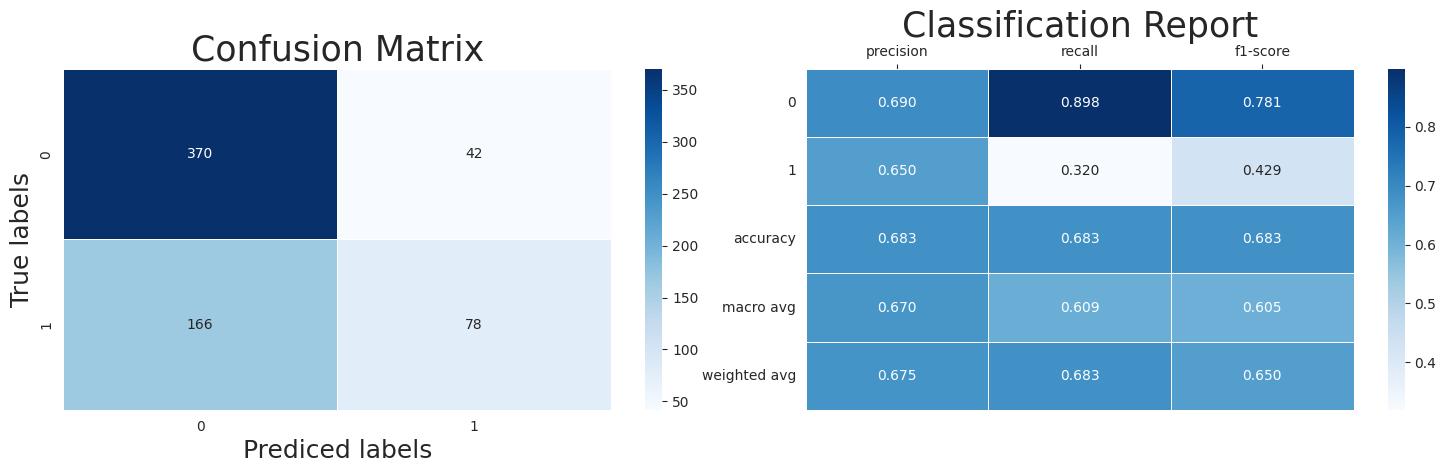

In [ ]:
plot_result(y_pred_rf)

In [ ]:
#MLPClassifier
# a dictionary to define parameters to test in algorithm
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],

}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [ ]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print(colored('MLPClassifier Score : {}'.format(mlp_score), 'green'))

MLPClassifier Score : 0.63


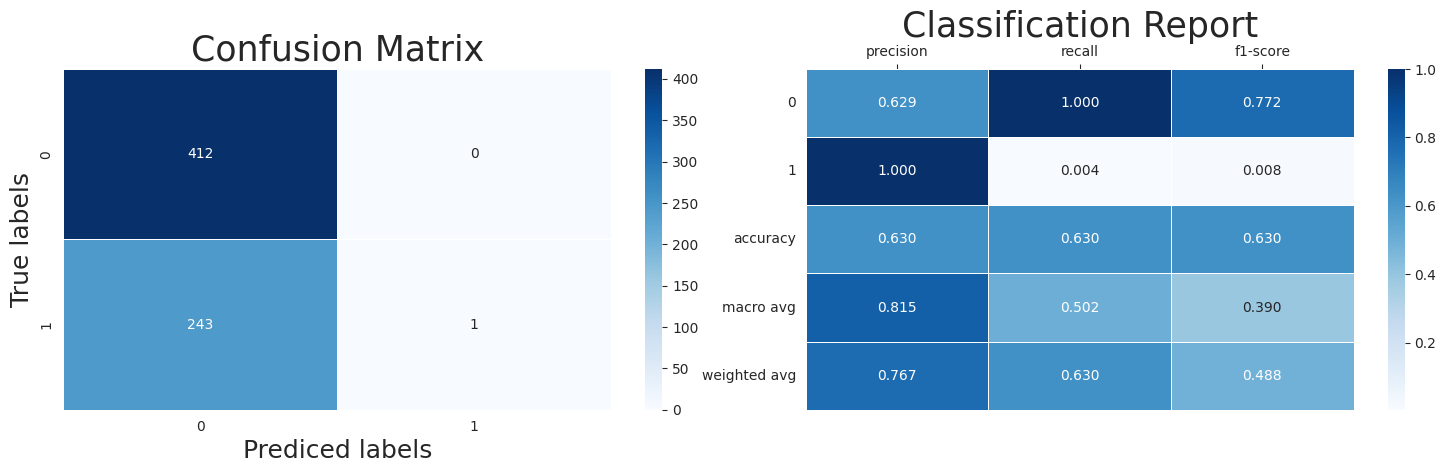

In [ ]:
plot_result(y_pred_mlp)

In [ ]:
#KNeighborsClassifier
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print(colored('KNeighborsClassifier Score : {}'.format(knn_score), 'green'))

KNeighborsClassifier Score : 0.616


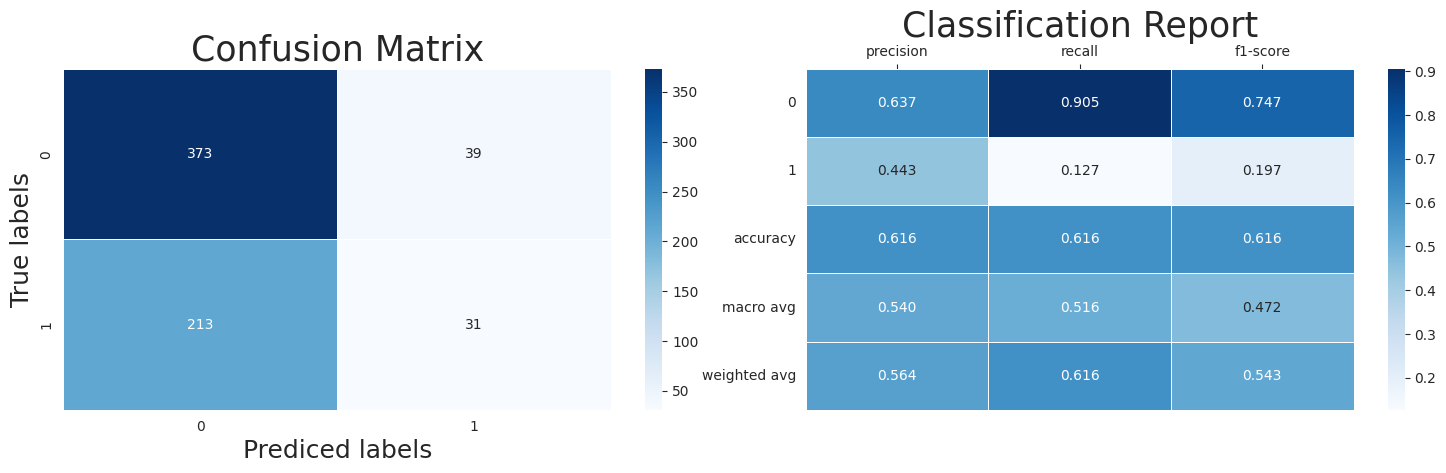

In [ ]:
plot_result(y_pred_knn)

In [ ]:
# Result
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'MLPClassifier'],
    'Score' : [rf_score, lr_score,  knn_score, mlp_score]
})


result.style.background_gradient()

,Algorithm,Score
0,RandomForestClassifier,0.683000
1,LogisticRegression,0.627000
2,KNeighborsClassifier,0.616000
3,MLPClassifier,0.630000


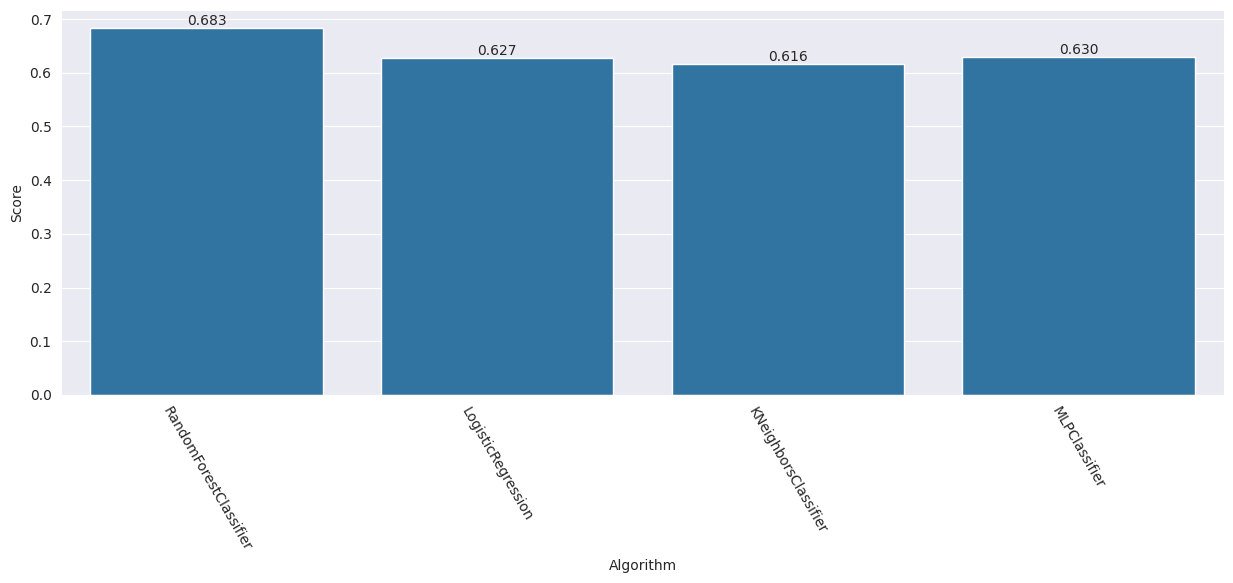

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [ ]:
# Step 3: Handle Missing Values (Using Median Imputation)
imputer = df.fillna(df.median())

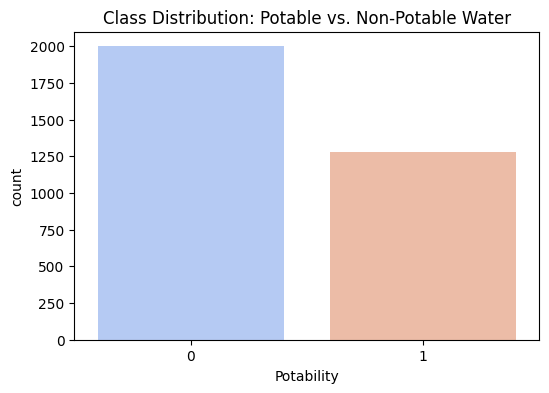

In [ ]:
# Step 4: Check Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=imputer, x='Potability', hue='Potability', palette='coolwarm', legend=False)
plt.title("Class Distribution: Potable vs. Non-Potable Water")
plt.show()



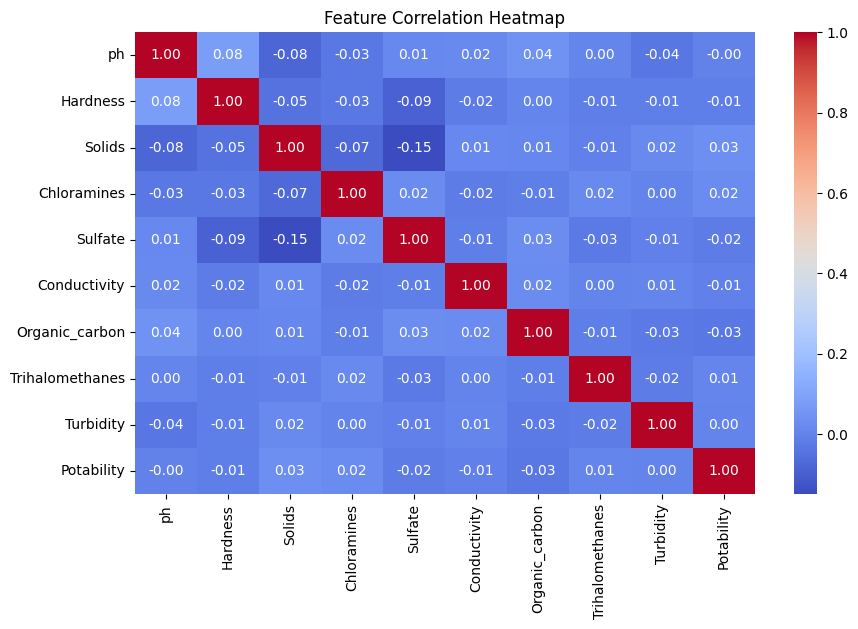

In [ ]:
# Step 5: Feature Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(imputer.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

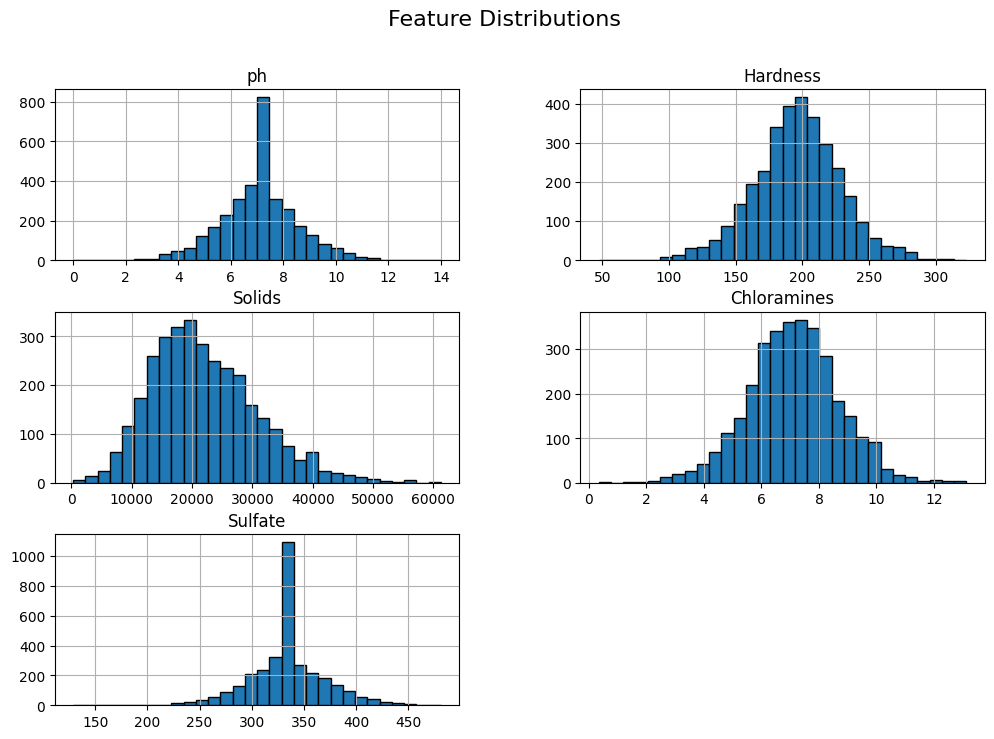

In [ ]:
# Step 6: Distribution of Key Features
features = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate"]
imputer[features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
# Step 7: Split Features and Target
X = imputer.drop(columns=["Potability"])
y = imputer["Potability"]

In [ ]:
# Step 8: Handle Class Imbalance with Undersampling
undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

In [ ]:
# Step 9: Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [ ]:
# Step 10: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 12: Model Prediction
y_pred = model.predict(X_test_scaled)


In [ ]:
# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 0.61
Confusion Matrix:
 [[166  90]
 [112 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       256
           1       0.62      0.56      0.59       256

    accuracy                           0.61       512
   macro avg       0.61      0.61      0.60       512
weighted avg       0.61      0.61      0.60       512



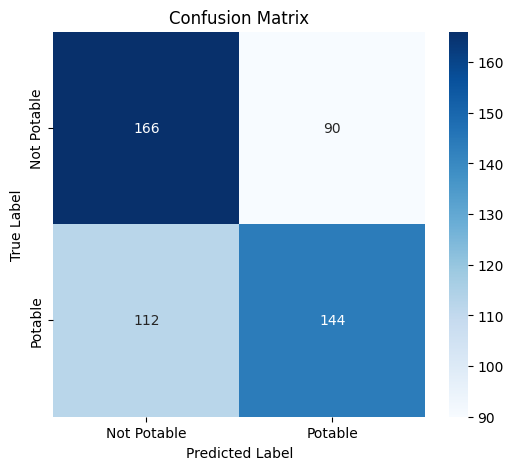

In [ ]:

# Step 14: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()